# 2015 Temperature Records near Ann Arbor, Michigan

**Purpose:**
Use historical temperatures recorded by weather stations near Ann Arbor from 2000-2014 to plot temperature records broken in 2015.

The following variables are provided:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

## Read the csv file into a DataFrame
1. Read the csv into a pandas DataFrame
2. Convert Date column from strings to a datetime object
3. Select datetime range to work with
4. Remove any leap days, ie. dates with month=2 & days=29, from Date

In [98]:
from matplotlib.dates import MonthLocator, DateFormatter
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import seaborn as sns

In [108]:
# Load csv as DataFrame
noaa_df = pd.read_csv('C:\\Users\\Carson\\Desktop\\Ann Arbor Temps.csv')
noaa_df.sort_values('Date', inplace=True)

noaa_df.head()

,ID,Date,Element,Data_Value
60995,USW00004848,2005-01-01,TMIN,0
17153,USC00207320,2005-01-01,TMAX,150
17155,USC00207320,2005-01-01,TMIN,-11
10079,USW00014833,2005-01-01,TMIN,-44
10073,USW00014833,2005-01-01,TMAX,33


In [109]:
# Convert dates from strings to datetime
noaa_df['Date'] = pd.to_datetime(noaa_df.Date)

# Convert degrees from tenths to whole degrees Celcius
noaa_df['Data_Value'] = noaa_df.Data_Value / 10
noaa_df['MM-DD'] = noaa_df.Date.dt.strftime('%m-%d') # Requires improvement.

noaa_df.dtypes

ID                    object
Date          datetime64[ns]
Element               object
Data_Value           float64
MM-DD                 object
dtype: object

In [110]:
# Select rows from date range 
start = pd.to_datetime('2005-01-01')
end = pd.to_datetime('2014-12-31')
df = noaa_df[(noaa_df.Date >= start) & (noaa_df.Date <= end)] 

# Remove all leap days (February 29ths)
df = df[~((df.Date.dt.month == 2) & (df.Date.dt.day == 29))] # '~' returns the complement

## Plotting the data
1. Create record high (`tmax`) and record low (`tmin`) based on day of the year (Jan 1st to Dec 31th) from 2005 to 2014
2. Plot them with a line graph using parameters x = Date, y = Data_Value
    * Note: Data_Value is in tenths of degrees Celcius
3. Shade the area between `tmax` and `tmin`

In [111]:
recordHigh = df.groupby(df['MM-DD']).Data_Value.max()
recordLow = df.groupby(df['MM-DD']).Data_Value.min()

print(recordHigh.head())
print(recordLow.head())

MM-DD
01-01    15.6
01-02    13.9
01-03    13.3
01-04    10.6
01-05    12.8
Name: Data_Value, dtype: float64
MM-DD
01-01   -16.0
01-02   -26.7
01-03   -26.7
01-04   -26.1
01-05   -15.0
Name: Data_Value, dtype: float64


In [112]:
# Generate series of recorded tmax and tmin in 2015
recentYear = noaa_df[noaa_df.Date.dt.year == 2015]

tmax_2015 = recentYear.groupby(recentYear['MM-DD']).Data_Value.max()
tmin_2015 = recentYear.groupby(recentYear['MM-DD']).Data_Value.min()

print(tmax_2015.head())
print(tmin_2015.head())

MM-DD
01-01    1.1
01-02    3.9
01-03    3.9
01-04    4.4
01-05    2.8
Name: Data_Value, dtype: float64
MM-DD
01-01   -13.3
01-02   -12.2
01-03    -6.7
01-04    -8.8
01-05   -15.5
Name: Data_Value, dtype: float64


In [113]:
# Generate Boolean mask of broken max/min records 
broken_max_2015 = tmax_2015 > recordHigh
broken_min_2015 = tmin_2015 < recordLow

print(broken_max_2015.head())
print(broken_min_2015.head())

MM-DD
01-01    False
01-02    False
01-03    False
01-04    False
01-05    False
Name: Data_Value, dtype: bool
MM-DD
01-01    False
01-02    False
01-03    False
01-04    False
01-05     True
Name: Data_Value, dtype: bool


<IPython.core.display.Javascript object>


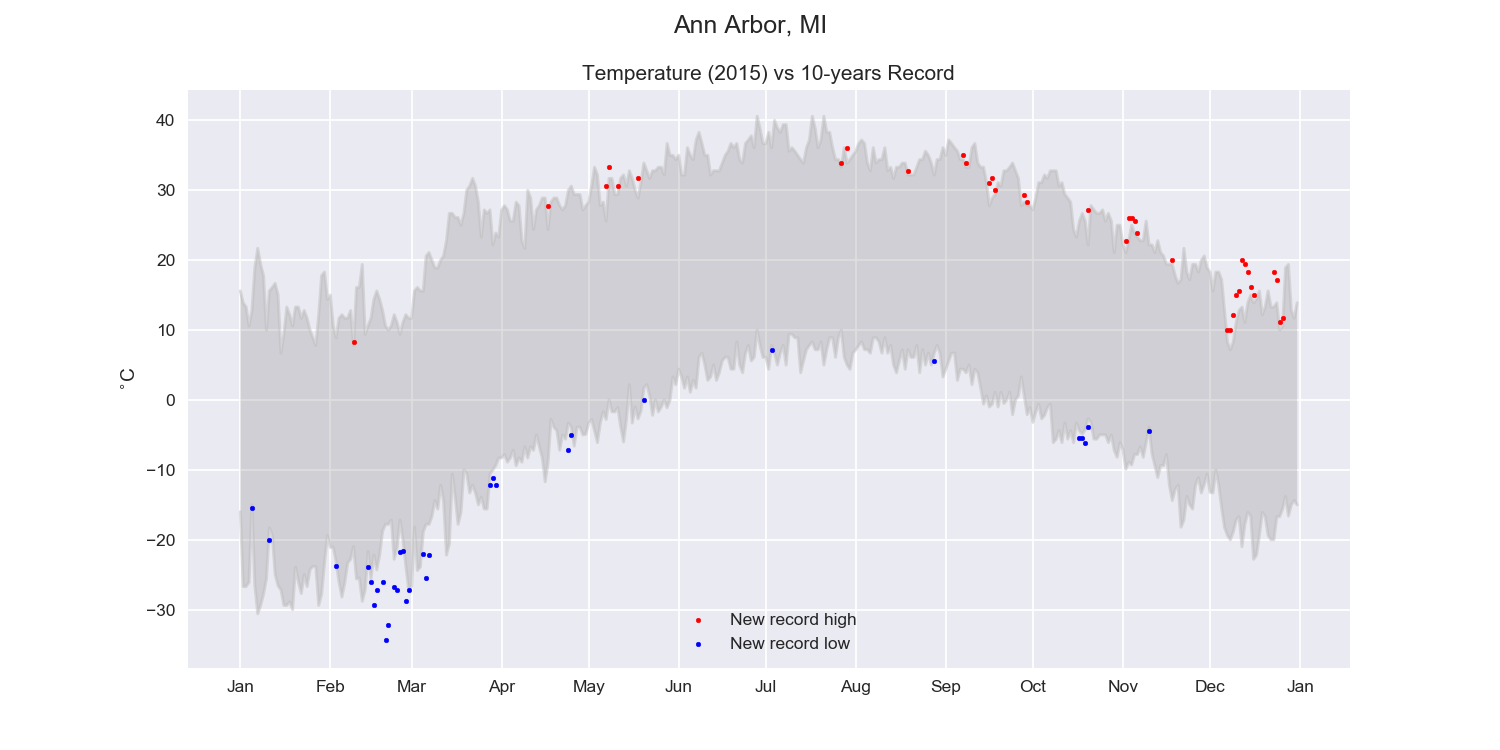

In [118]:
%matplotlib notebook

# Form date range to be our x-axis
xtick_date_range = pd.date_range('2015-01-01', '2015-12-31')

# Initiate plot and set style
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style("darkgrid") # Use seaborn theme

# Plot 10-year historic record highs/lows and fill between
plt.plot(xtick_date_range, recordHigh.values, ls='-', color='0.75', alpha=0.50, zorder=1)
plt.plot(xtick_date_range, recordLow.values, ls='-', color='0.75', alpha=0.50, zorder=1)
ax.fill_between(xtick_dates,
                recordHigh, recordLow,
                facecolor='grey',
                alpha=0.25)

# Overlay a scatter plot of broken maximum/minimum records over the current plot
plt.scatter(xtick_date_range[broken_max_2015], tmax_2015[broken_max_2015], 
            c='r', 
            marker='o',
            s=7,
            label='New record high',
            zorder=2) # Plot order
plt.scatter(xtick_date_range[broken_min_2015], tmin_2015[broken_min_2015], 
            c='b', 
            marker='o',
            s=7,
            label='New record low',
            zorder=2)

# Remove the top and right spines of the graph for visibility
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Format x-axis ticks spacing and labels
ax.xaxis.set_major_formatter(DateFormatter('%b')) # %b sets Month as locale’s abbreviated name.
ax.xaxis.set_major_locator(MonthLocator())

# Add titles, labels, and legend to plot
plt.suptitle('Ann Arbor, MI')
plt.title('Temperature (2015) vs 10-years Record')
plt.ylabel('$^{\circ}$C')
plt.legend(loc=8)
